# 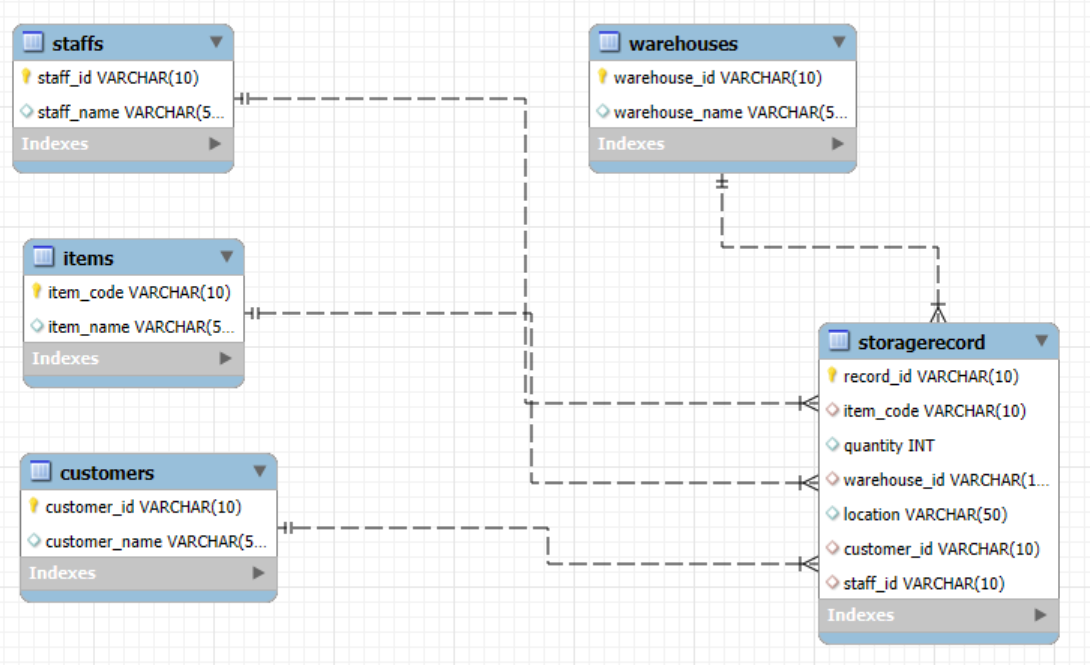

In [ ]:
# Khóa chính của Bảng StorageRecords_Raw là record_id vì:
# Mỗi record_id xác định duy nhất một bản ghi trong bảng
# Không có giá trị record_id nào bị trùng lặp/NULL

In [ ]:
# Bảng chưa đạt chuẩn 1NF: Các cột có kiểu dữ liệu nhất quán và có tên duy nhất
# Bị lặp lại thông tin (tại cột warehouse_id, warehouse_name lặp lại nhiều lần: cặp WH01-Main Warehouse lặp lại 3 lần)

In [ ]:
# 2F:
# Bảng có các thuộc tính không phụ thuộc đầy đủ vào khóa chính (record_id)
#     warehouse_name (phụ thuộc vào warehouse_id)
#   customer_name (phụ thuộc vào customer_id)
#    staff_name (phụ thuộc vào staff_id)
#    item_name (phụ thuộc vào item_code)

In [ ]:
# 3F:
# Có các thuộc tính không khóa phụ thuộc vào thuộc tính không khóa khác

In [ ]:
!pip install mysql-connector-python

In [ ]:
# import mysql.connector
# db = mysql.connector.connect(user = "root", password = "abc13579",
#                              host="localhost")

# print(db)

# query = 'CREATE SCHEMA database_d43'
# cursor = db.cursor()
# cursor.execute(query)

In [ ]:
import mysql.connector

connection = mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="      ,
    database="chuanthu3")
cursor = connection.cursor()

In [ ]:
query="""CREATE SCHEMA chuanthu3"""
cursor.execute(query)

In [ ]:
cursor.execute("""
create table if not exists chuanthu3.Items(
    item_code VARCHAR(10) PRIMARY KEY,
    item_name VARCHAR(50)
) ENGINE=InnoDB;
""")
cursor.execute("""
CREATE TABLE IF NOT EXISTS Warehouses(
    warehouse_id VARCHAR(10) PRIMARY KEY,
    warehouse_name VARCHAR(50)
) ENGINE=InnoDB;
""")
cursor.execute("""
CREATE TABLE IF NOT EXISTS Customers(
    customer_id VARCHAR(10) PRIMARY KEY,
    customer_name VARCHAR(50)
) ENGINE=InnoDB;
""")

cursor.execute("""
CREATE TABLE IF NOT EXISTS Staffs(
    staff_id VARCHAR(10) PRIMARY KEY,
    staff_name VARCHAR(50)
) ENGINE=InnoDB;
""")

cursor.execute("""
CREATE TABLE IF NOT EXISTS StorageRecord(
    record_id VARCHAR(10) PRIMARY KEY,
    item_code VARCHAR(10),
    quantity INT,
    warehouse_id VARCHAR(10),
    location VARCHAR(50),
    customer_id VARCHAR(10),
    staff_id VARCHAR(10),
    FOREIGN KEY(item_code) REFERENCES Items(item_code),
    FOREIGN KEY(warehouse_id) REFERENCES Warehouses(warehouse_id),
    FOREIGN KEY(customer_id ) REFERENCES Customers(customer_id),
    FOREIGN KEY(staff_id) REFERENCES Staffs(staff_id)
) ENGINE=InnoDB;
""")
connection.commit()

In [ ]:
cursor.execute("""
INSERT IGNORE INTO Items(item_code, item_name) VALUES
    ('IT001', 'Motor Oil 5L'),
    ('IT002', 'Engine Cleaner'),
    ('IT003', 'Battery 12V')
;
""")

cursor.execute("""
INSERT IGNORE INTO Warehouses VALUES
    ('WH01', 'Main Warehouse'),
    ('WH02', 'North Depot')
;
""")

cursor.execute("""
INSERT IGNORE INTO Customers VALUES
    ('C001', 'Mekong Corp'),
    ('C002', 'Vina Auto'),
    ('C003', 'Delta Co')
;
""")

cursor.execute("""
INSERT IGNORE INTO Staffs VALUES
    ('S01', 'Hoa Nguyen'),
    ('S02', 'Khang Tran')
;
""")

cursor.execute("""
INSERT IGNORE INTO StorageRecord VALUES
    ('R001', 'IT001', 50, 'WH01', 'Shelf A1', 'C001', 'S01'),
    ('R002', 'IT002', 30, 'WH01', 'Shelf B2', 'C002', 'S02'),
    ('R003', 'IT001', 40, 'WH02', 'Shelf C3', 'C001', 'S01'),
    ('R004', 'IT003', 25, 'WH01', 'Shelf A1', 'C003', 'S02')
;
""")
connection.commit()

In [ ]:
import pandas as pd
query="""
SELECT *
FROM StorageRecord
;
"""
connection.commit()
data=pd.read_sql_query(query, connection)
data

In [ ]:
query="""
SELECT w.warehouse_name, i.item_name, SUM(sr.quantity) AS total_quantity
FROM StorageRecord sr
JOIN Items i ON sr.item_code = i.item_code
JOIN Warehouses w ON sr.warehouse_id = w.warehouse_id
GROUP BY w.warehouse_name, i.item_name
;
"""
connection.commit()
data=pd.read_sql_query(query, connection)
data

In [ ]:
query="""
SELECT DISTINCT c.customer_name, i.item_name
FROM StorageRecord sr
JOIN Items i ON sr.item_code = i.item_code
JOIN Customers c ON c.customer_id = sr.customer_id
;
"""
connection.commit()
data=pd.read_sql_query(query, connection)
data

In [ ]:
query="""
SELECT DISTINCT s.staff_name
FROM StorageRecord sr
JOIN Staffs s ON s.staff_id = sr.staff_id
JOIN Warehouses w ON w.warehouse_id = sr.warehouse_id
WHERE 1=1
AND w.warehouse_name = 'Main Warehouse'
;
"""
connection.commit()
data=pd.read_sql_query(query, connection)
data

In [ ]:

query="""
SELECT DISTINCT w.warehouse_name, i.item_name, sr.location
FROM StorageRecord sr
JOIN Items i ON i.item_code = sr.item_code
JOIN Warehouses w ON w.warehouse_id = sr.warehouse_id
;
"""

connection.commit()
data=pd.read_sql_query(query, connection)
data

In [ ]:
query="""
SELECT
    w.warehouse_name,
    COUNT(DISTINCT sr.customer_id) AS total_customers
FROM StorageRecord sr
JOIN Customers c ON c.customer_id = sr.customer_id
JOIN Warehouses w ON w.warehouse_id = sr.warehouse_id
GROUP BY w.warehouse_name
;
"""
connection.commit()
data=pd.read_sql_query(query, connection)
data

# GROUP BY yêu cầu rằng tất cả các trường trong SELECT phải hoặc có mặt trong GROUP BY, hoặc phải được tính bằng hàm tổng hợp